Context-Sentiment Accuracy (상황 및 감정 정확도)

 Context-Sentiment Accuracy: 81.17%
 Persona-Genre Accuracy: 100.00%


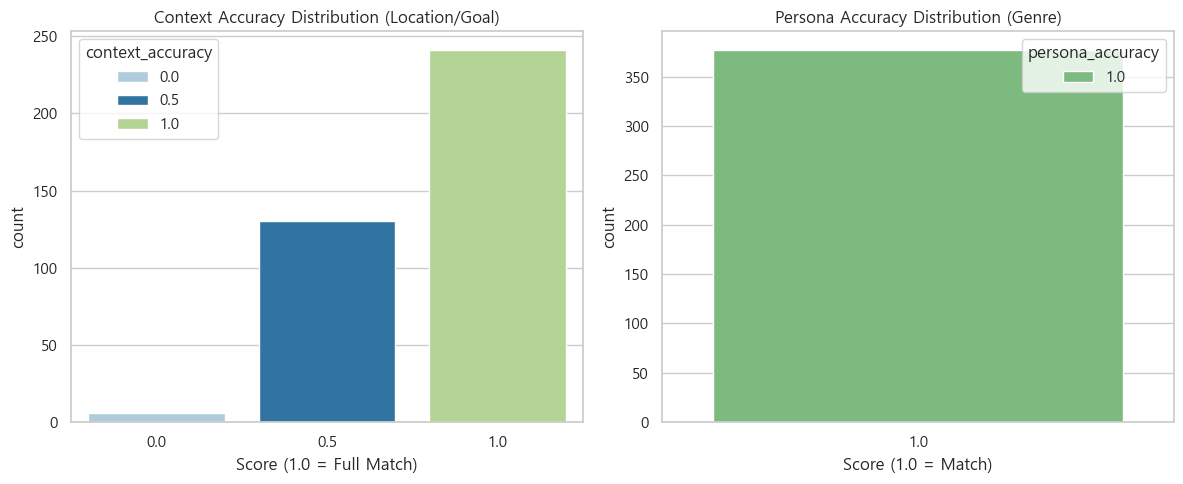

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('C:\\Users\\seonu\\Documents\\soundscape-data\\성능평가(KPI)\\dataset\\playlists_final.xlsx')

def calculate_keyword_accuracy(row):
    location = str(row['location']) if pd.notna(row['location']) else ""
    goal = str(row['goal']) if pd.notna(row['goal']) else ""
    reason = str(row['recommendation_reason']) if pd.notna(row['recommendation_reason']) else ""
    
    genre = str(row['user_persona_preferred_genres']) if pd.notna(row['user_persona_preferred_genres']) else ""
    summary = str(row['user_persona_taste_summary']) if pd.notna(row['user_persona_taste_summary']) else ""
    
    loc_match = 1 if location in reason else 0
    goal_match = 1 if goal in reason else 0
    context_score = (loc_match + goal_match) / 2 
    
    genre_match = 1 if genre in summary else 0  
    
    return pd.Series([context_score, genre_match])

df[['context_accuracy', 'persona_accuracy']] = df.apply(calculate_keyword_accuracy, axis=1)

total_context_acc = df['context_accuracy'].mean() * 100
total_persona_acc = df['persona_accuracy'].mean() * 100

print(f" Context-Sentiment Accuracy: {total_context_acc:.2f}%")
print(f" Persona-Genre Accuracy: {total_persona_acc:.2f}%")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='context_accuracy', hue='context_accuracy', palette='Paired')
plt.title('Context Accuracy Distribution (Location/Goal)')
plt.xlabel('Score (1.0 = Full Match)')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='persona_accuracy', hue='persona_accuracy', palette='Greens')
plt.title('Persona Accuracy Distribution (Genre)')
plt.xlabel('Score (1.0 = Match)')

plt.tight_layout()
plt.show()

Agent Latency (에이전트 지연 시간) 

 [지연 시간 통계 요약]
 - 평균 지연 시간: 7.62초
 - 중앙값: 6.34초
 - 최장 지연 시간: 18.97초
 - 최단 지연 시간: 1.01초


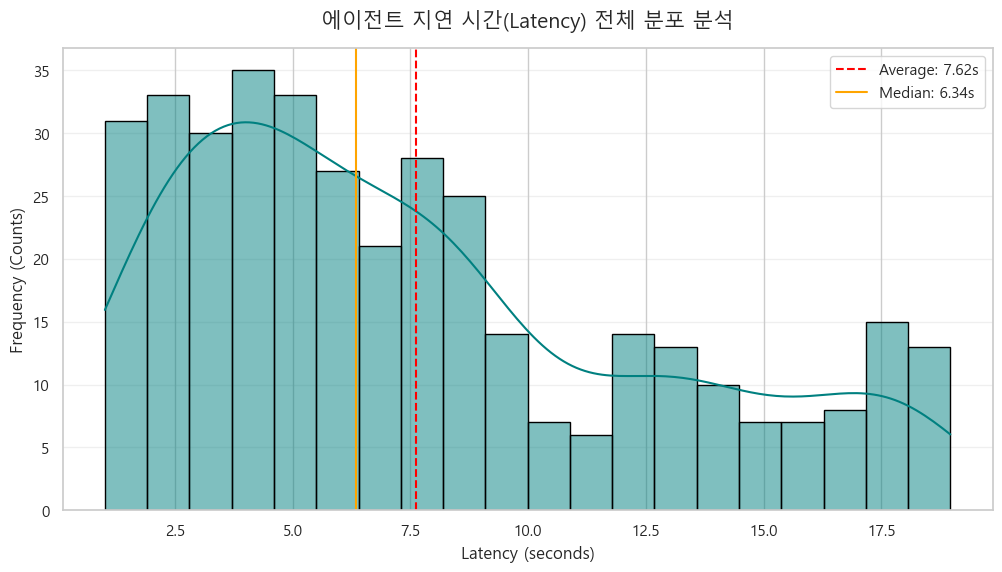

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_p = pd.read_excel('C:\\Users\\seonu\\Documents\\soundscape-data\\성능평가(KPI)\\dataset\\playlists_final.xlsx')

df_p['latency_sec'] = df_p['latency_ms'] / 1000

avg_latency = df_p['latency_sec'].mean()
median_latency = df_p['latency_sec'].median()
max_latency = df_p['latency_sec'].max()
min_latency = df_p['latency_sec'].min()

print(f" [지연 시간 통계 요약]")
print(f" - 평균 지연 시간: {avg_latency:.2f}초")
print(f" - 중앙값: {median_latency:.2f}초")
print(f" - 최장 지연 시간: {max_latency:.2f}초")
print(f" - 최단 지연 시간: {min_latency:.2f}초")


plt.figure(figsize=(12, 6))
sns.histplot(df_p['latency_sec'], bins=20, kde=True, color='teal', edgecolor='black')


plt.axvline(avg_latency, color='red', linestyle='--', label=f'Average: {avg_latency:.2f}s')
plt.axvline(median_latency, color='orange', linestyle='-', label=f'Median: {median_latency:.2f}s')

plt.title('에이전트 지연 시간(Latency) 전체 분포 분석', fontsize=15, pad=15)
plt.xlabel('Latency (seconds)', fontsize=12)
plt.ylabel('Frequency (Counts)', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

날짜별 지연 시간 추이 분석

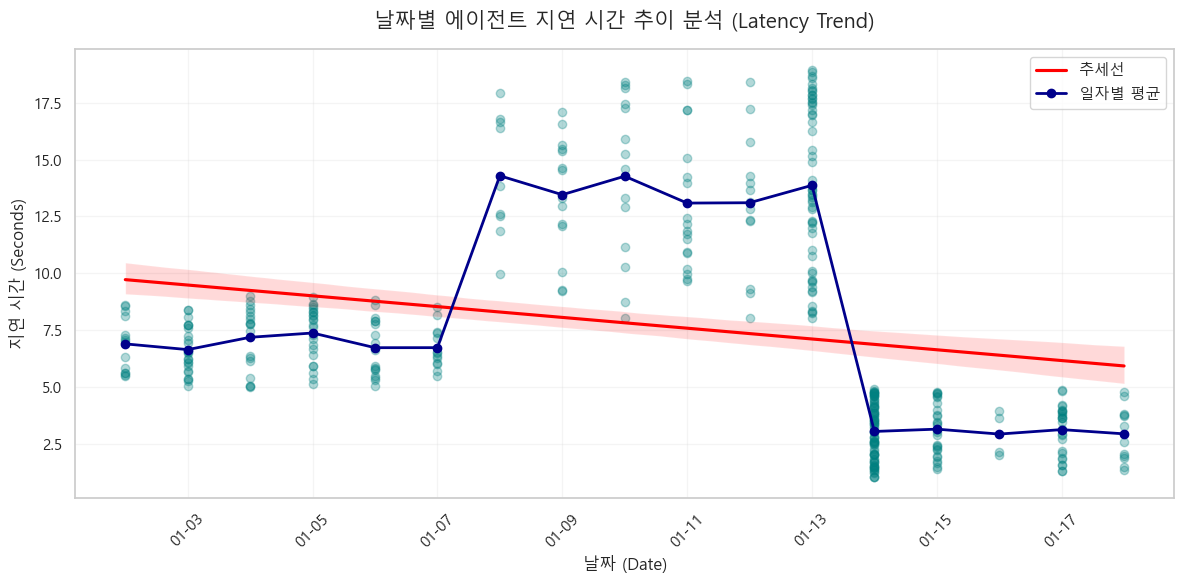

 날짜와 지연 시간 간의 상관계수: -0.2231
   (음수일 경우 최근으로 올수록 지연 시간이 줄어들고 있음을 의미)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

df_p = pd.read_excel('C:\\Users\\seonu\\Documents\\soundscape-data\\성능평가(KPI)\\dataset\\playlists_final.xlsx')
df_p['created_at'] = pd.to_datetime(df_p['created_at'])
df_p['latency_sec'] = df_p['latency_ms'] / 1000

df_p['date_only'] = df_p['created_at'].dt.date

daily_avg_latency = df_p.groupby('date_only')['latency_sec'].mean().reset_index()
daily_avg_latency['date_only'] = pd.to_datetime(daily_avg_latency['date_only'])

plt.figure(figsize=(12, 6))

sns.regplot(data=df_p, 
            x=df_p['created_at'].map(pd.Timestamp.toordinal), 
            y='latency_sec', 
            scatter_kws={'alpha':0.3, 'color':'teal'}, 
            line_kws={'color':'red', 'label':'추세선'})

plt.plot(daily_avg_latency['date_only'].map(pd.Timestamp.toordinal), 
         daily_avg_latency['latency_sec'], 
         marker='o', color='darkblue', linewidth=2, label='일자별 평균')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

plt.title('날짜별 에이전트 지연 시간 추이 분석 (Latency Trend)', fontsize=15, pad=15)
plt.xlabel('날짜 (Date)', fontsize=12)
plt.ylabel('지연 시간 (Seconds)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

correlation = df_p['created_at'].map(pd.Timestamp.toordinal).corr(df_p['latency_sec'])
print(f" 날짜와 지연 시간 간의 상관계수: {correlation:.4f}")
print("   (음수일 경우 최근으로 올수록 지연 시간이 줄어들고 있음을 의미)")

Deep Link Conversion (DLC)

 전체 Deep Link Conversion (DLC): 85.15%


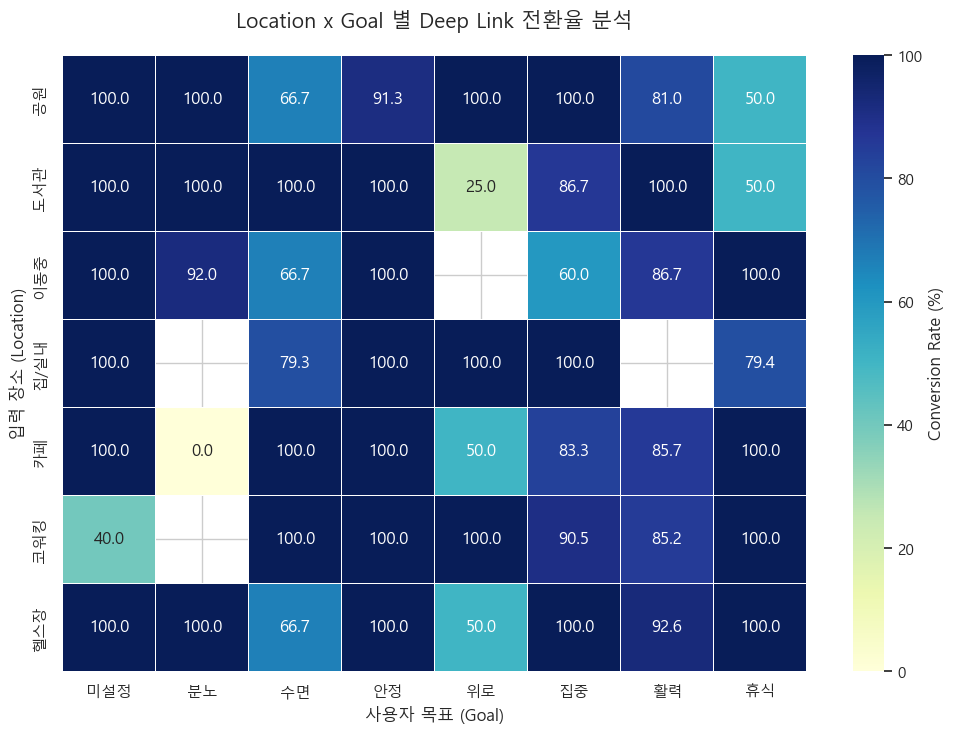


 [개선 필요] 전환율이 가장 낮은 상황 TOP 5:
location  goal
카페        분노       0.0
도서관       위로      25.0
코워킹       미설정     40.0
도서관       휴식      50.0
카페        위로      50.0
Name: is_clicked, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_p = pd.read_excel('C:\\Users\\seonu\\Documents\\soundscape-data\\성능평가(KPI)\\dataset\\playlists_final.xlsx')
df_c = pd.read_excel('C:\\Users\\seonu\\Documents\\soundscape-data\\성능평가(KPI)\\dataset\\spotify_link_click.xlsx')

df_merged = pd.merge(
    df_p, 
    df_c[['playlist_id']], 
    left_on='id', 
    right_on='playlist_id', 
    how='left'
)

df_merged['is_clicked'] = df_merged['playlist_id'].apply(lambda x: 1 if pd.notna(x) else 0)

total_dlc = df_merged['is_clicked'].mean() * 100
print(f" 전체 Deep Link Conversion (DLC): {total_dlc:.2f}%")

dlc_pivot = df_merged.pivot_table(
    index='location', 
    columns='goal', 
    values='is_clicked', 
    aggfunc='mean'
) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(
    dlc_pivot, 
    annot=True, 
    fmt=".1f", 
    cmap='YlGnBu', 
    linewidths=.5,
    cbar_kws={'label': 'Conversion Rate (%)'}
)

plt.title('Location x Goal 별 Deep Link 전환율 분석', fontsize=15, pad=20)
plt.xlabel('사용자 목표 (Goal)', fontsize=12)
plt.ylabel('입력 장소 (Location)', fontsize=12)
plt.show()

low_performance = df_merged.groupby(['location', 'goal'])['is_clicked'].mean().sort_values().head(5) * 100
print("\n [개선 필요] 전환율이 가장 낮은 상황 TOP 5:")
print(low_performance)

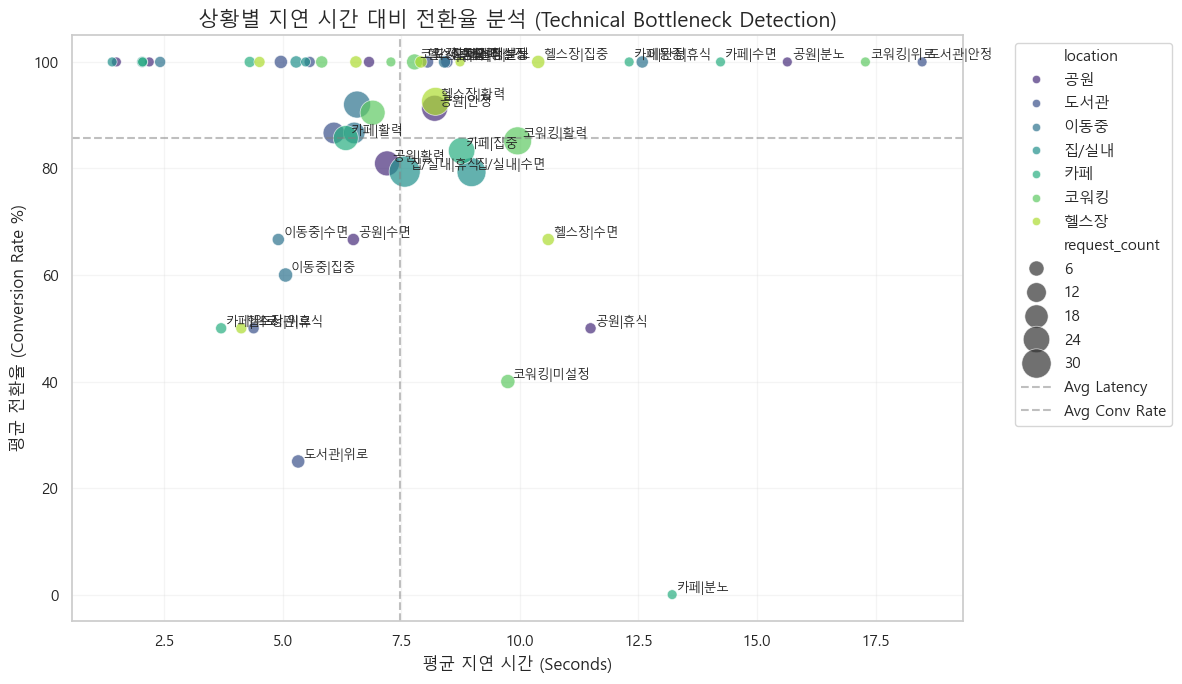

 [분석 결과] 기술적 병목이 의심되는 상황 (High Latency & Low Conversion):


,location,goal,conv_rate,avg_latency,request_count
30,카페,분노,0.000000,13.211000,1
37,코워킹,미설정,40.000000,9.745600,5
7,공원,휴식,50.000000,11.490000,2
46,헬스장,수면,66.666667,10.597333,3
24,집/실내,수면,79.310345,8.979034,29
28,집/실내,휴식,79.411765,7.569412,34
34,카페,집중,83.333333,8.770000,24
42,코워킹,활력,85.185185,9.951148,27


In [6]:
df_merged = pd.merge(df_p, df_c[['playlist_id']], left_on='id', right_on='playlist_id', how='left')
df_merged['is_clicked'] = df_merged['playlist_id'].apply(lambda x: 1 if pd.notna(x) else 0)
df_merged['latency_sec'] = df_merged['latency_ms'] / 1000

agg_df = df_merged.groupby(['location', 'goal']).agg({
    'is_clicked': 'mean',
    'latency_sec': 'mean',
    'id': 'count' 
}).reset_index()

agg_df.columns = ['location', 'goal', 'conv_rate', 'avg_latency', 'request_count']
agg_df['conv_rate'] *= 100 

plt.figure(figsize=(12, 7))

scatter = sns.scatterplot(
    data=agg_df, 
    x='avg_latency', 
    y='conv_rate', 
    size='request_count', 
    hue='location',
    sizes=(50, 500), 
    alpha=0.7, 
    palette='viridis'
)

for i in range(agg_df.shape[0]):
    if agg_df.conv_rate[i] < agg_df.conv_rate.mean() or agg_df.avg_latency[i] > agg_df.avg_latency.mean():
        plt.text(
            agg_df.avg_latency[i]+0.1, 
            agg_df.conv_rate[i]+0.5, 
            f"{agg_df.location[i]}|{agg_df.goal[i]}", 
            fontsize=9
        )

plt.axvline(agg_df['avg_latency'].mean(), color='gray', linestyle='--', alpha=0.5, label='Avg Latency')
plt.axhline(agg_df['conv_rate'].mean(), color='gray', linestyle='--', alpha=0.5, label='Avg Conv Rate')

plt.title('상황별 지연 시간 대비 전환율 분석 (Technical Bottleneck Detection)', fontsize=15)
plt.xlabel('평균 지연 시간 (Seconds)', fontsize=12)
plt.ylabel('평균 전환율 (Conversion Rate %)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

bottleneck = agg_df[
    (agg_df['avg_latency'] > agg_df['avg_latency'].mean()) & 
    (agg_df['conv_rate'] < agg_df['conv_rate'].mean())
].sort_values(by='conv_rate')

print(" [분석 결과] 기술적 병목이 의심되는 상황 (High Latency & Low Conversion):")
display(bottleneck)

- 높은 전반적 수용도: 전체 DLC가 85.15%에 달하는 것은 에이전트의 추천이 대다수 유저의 니즈를 만족시키고 있음을 보여주며, 특히 특정 장소와 목표가 결합된 상황에서 강력한 전환 동기를 제공하고 있음

- 부정적 감정 및 특정 공간 로직의 한계: '카페-분노(0%)'나 '도서관-위로(25%)'와 같이 장소의 성격과 유저의 감정 상태가 상충하거나 복잡한 맥락이 필요한 경우 전환율이 급격히 떨어지는 양상을 보임

- 맥락 최적화 필요성: 특히 '카페'와 '도서관'처럼 공공적인 공간에서 위로나 분노 해소와 같은 개인적인 감정 케어 요청이 들어올 때, 에이전트가 제안하는 음악 스타일이나 추천 사유가 공간의 분위기와 어긋나지 않는지 로직 재검토가 필요함

Satisfaction RMSE

 복합 키 매칭 결과: 26개의 유효 데이터가 매칭되었습니다.
 Satisfaction RMSE: 1.1353


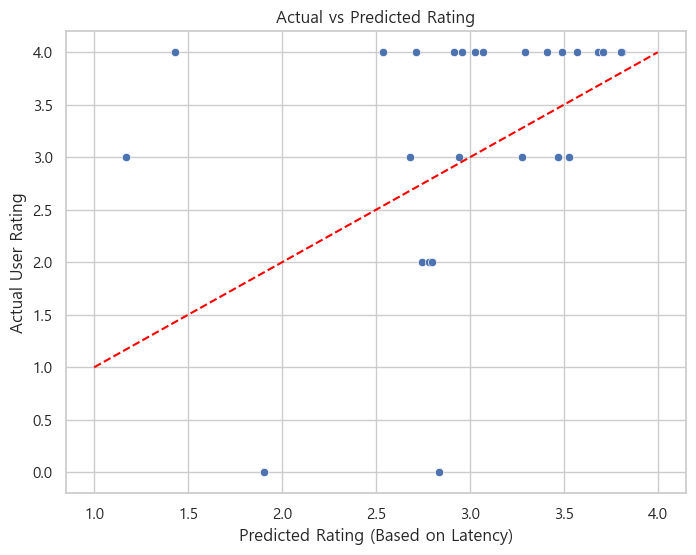

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

df_r = pd.read_excel('C:\\Users\\seonu\\Documents\\soundscape-data\\성능평가(KPI)\\dataset\\reviews.xlsx')

match_cols = ['user_id', 'location', 'decibel', 'goal']

for col in match_cols:
    df_p[col] = df_p[col].astype(str).str.strip()
    df_r[col] = df_r[col].astype(str).str.strip()

df_merged = pd.merge(df_p, df_r, on=match_cols, how='inner')

df_merged = df_merged.drop_duplicates(subset=match_cols, keep='last')

print(f" 복합 키 매칭 결과: {len(df_merged)}개의 유효 데이터가 매칭되었습니다.")


def predict_satisfaction(row):
    max_score = 4.0           
    latency_sec = row['latency_ms'] / 1000
    penalty_weight = 0.15     
    
    predicted = max_score - (penalty_weight * latency_sec)
    
    return max(1.0, min(4.0, predicted))

df_merged['predicted_rating'] = df_merged.apply(predict_satisfaction, axis=1)

actual = df_merged['rating']
predicted = df_merged['predicted_rating']

if len(df_merged) > 0:
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f" Satisfaction RMSE: {rmse:.4f}")
else:
    print("매칭된 데이터가 없습니다. 컬럼 값의 형식이 일치하는지 확인해주세요.")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted, y=actual)
plt.plot([1, 4], [1, 4], color='red', linestyle='--')
plt.title('Actual vs Predicted Rating')
plt.xlabel('Predicted Rating (Based on Latency)')
plt.ylabel('Actual User Rating')
plt.show()

- 예측 모델의 오차 존재: RMSE가 약 1.14로 나타난 것은 시스템이 지연 시간(Latency)만으로 예측한 만족도와 유저의 실제 별점 사이에 평균 1점 이상의 차이가 있음을 의미하며, 이는 유저가 속도뿐만 아니라 추천된 곡의 품질이나 분위기 등 콘텐츠 자체를 중요하게 평가하고 있음을 시사함

- 보정 방향성 제시: 현재 시스템이 지연 시간 패널티를 통해 다소 보수적이거나 일률적인 예측을 하고 있을 가능성이 높으므로, 향후 RMSE를 낮추기 위해서는 앞서 계산한 '상황 정확도(Context Accuracy)'와 같은 콘텐츠 일치 지표를 예측 수식에 결합하여 시스템의 자기 객관화 능력을 개선해야함